# K nearest neighbor Classifier

 ## About Algorithm            

### What is K-Nearest Neighbour algorithm?
    1. KNN algorithm is a supervised , and lazy classification technique. 
    2. In normal term, if person X is 30 and all his friends are married people assume that the person X married because all the people close to him are married.
    3. It calculate the euclidean distance for the input data which needs to be classified and the data which is used to train the model.
    4. Once the euclidean distance is calculated, it consider the K number of nearest neighbour and classifies the given input to the most repeated group in the list.
    5. Identifying the K is critical.

### When to use KNN?
    1. When dataset is small
    2. When classification is required

### Pros
    1. Easy to implement and  understand
    2. Good results with small dataset

### Cons
    1. Computation cost is high(which is n^2)
    2. Not suitable for large dataset


## About Notebook

### Problem Statement
    To Classify whether the cancer is benign or malignant based on 9 attributes.

### Dataset
    1. Wisconsin Breast Cancer Database (January 8, 1991) with 10 attributes and 699 data points
    2. Attributes
        1. Sample code number  (id name)
        2. Clump Thickness ()
        3. Uniformity of the cell Size ()
        4. Uniformity of the cell shape ()
        5. Marginal Adhesion ()
        6. Single Epithelial Cell Size ()
        7. Bare Nuclei ()
        8. Bland Chromatin ()
        9. Normal Nucleoli ()
        10. Mitoses ()
        11. Class ()
    
## What is done here
    1. All the necessary modules are imported
    2. Data cleanup process
        1. Attribute ‘Sample code number’ is removed as it has nothing to do with classification
        2. Attribute ‘Bare Nuclei’ have ‘?’ which are missing values hence updated with mean value(count('?) is 16)
    3. Correlation is checked tp understand whether PCA can be applied for on the dataset. (I would say it needs to be applied but not applied)
    4. All dependent attributes are stored in X and their respective are stored in Y.
    5. Data is split into 80% training data and 20% testing data
    6. Finding best K,
        1. Model is iterated for with different K value ranging from 1 to 15
        2. Training and testing accuracy for each iteration is recorded 
        3. Graph is plotted against K value and its respective training and  testing  accuracy
        4. Using elbow method the best K value is selected. (After some value of K accuracy will be steady and that point is our K)
    7. Model built with the best K found in the previous step

## Output Interpretation
    1. Accuracy can be evaluated using confusion matrix. Which is a square matrix and its size depends on number of Classed
    2. Important Terminologies
        1. TN / True Negative: when a case was negative and predicted negative
        2. TP / True Positive: when a case was positive and predicted positive
        3. FN / False Negative: when a case was positive but predicted negative
        4. FP / False Positive: when a case was negative but predicted positive.
    3. Precession:
        1. Describes what percentage of your prediction were correct
        2. Precession = TP/(TP+FP)
    4. Recall:
        1. Describes what percentage of the positive cases did you catch.
        2. Recall = TP/(TP+FN)
    5. F1 Score
        1. Describe what percentage of the positive prediction were correct
        2. F1 Score = s((Recall*Precession)/(Recall+Precession))


In [197]:
#importing necessary packages
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
#loading dataset
url = 'https://raw.githubusercontent.com/iamchiragshekars/Machine-Learning/master/Classification/breast-cancer-wisconsin.csv'
dataset = pa.read_csv(url, error_bad_lines=False)

In [199]:
#verifying the data import
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [200]:
#checking for null values and more information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [201]:
#Dataset clean up / data wrangling
dataset = dataset.replace('?',np.NaN).fillna(0).astype(int)

dataset['Bare Nuclei'] = dataset['Bare Nuclei'].replace(0,dataset['Bare Nuclei'].mean())

dataset.iloc[:,10].replace(2, 0,inplace=True)
dataset.iloc[:,10].replace(4, 1,inplace=True)

dataset = dataset.drop('Sample code number', axis=1);

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null float64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [202]:
#get satistical information about the dataset
dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.542799,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601872,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


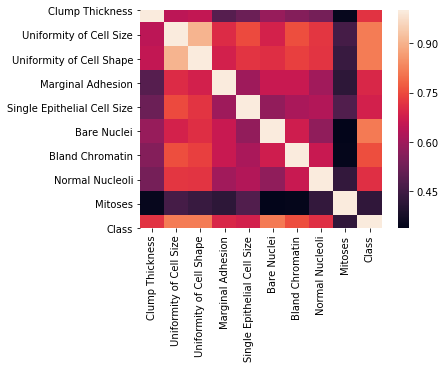

In [203]:
#visualising the correlation matrix
sns.heatmap(dataset.corr(), vmax=1, square=True)

In [204]:
#Checing the correlation between the attributes to check whether feature extration is required or not
dataset.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.587488,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686915,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.709660,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.665225,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.581440,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.587488,0.686915,0.709660,0.665225,0.581440,1.000000,0.675958,0.577378,0.338916,0.816284
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.675958,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.577378,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.338916,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.816284,0.756616,0.712244,0.423170,1.000000


In [205]:
#loading dataset to dependent variables and there respective classes
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

In [224]:
#dividing dataset into trainig and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [225]:
#itrating K values and capturing its training and testing accuracy 
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train,y_train)
    
    train_accuracy[i] = knn.score(X_train,y_train)
    
    test_accuracy[i] = knn.score(X_test,y_test)
    

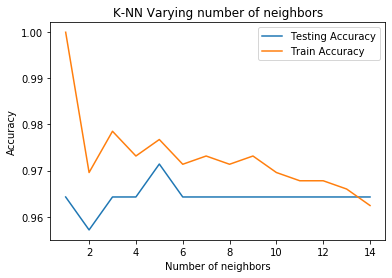

In [226]:
#using elbow method to choose the best value for K
plt.title('K-NN Varying number of neighbors')
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Train Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [227]:
#fitting the model
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [228]:
#predecting the class for X_test dataset
y_pred = classifier.predict(X_test)

In [229]:
#report about the modle which describes the efficency
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[82  4]
 [ 1 53]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        86
           1       0.93      0.98      0.95        54

    accuracy                           0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140

